In [1]:
import sys
import os
searchPath=os.path.abspath('..')
sys.path.append(searchPath)

In [2]:
from kmeans_base import KMeansBase
from kmeans_plus import KMeansPlusPlus
import time

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import datasets

import numpy as np
import pandas as pd

from utils.misc_utils import distance, sortLabel
from kmeans.kmeans_base import KMeansBase
from radar import plot_radar

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("data.csv")
dataset = dataset.values

[[-2.83873351e-01 -7.95029666e-02 -4.94050564e-01 -5.06570678e-01
  -9.25876986e-02]
 [ 1.15264766e+00 -8.51290427e-01  2.97851160e+00  3.37834151e+00
   1.66293022e-01]
 [-1.06961896e-01 -8.34763928e-01  2.02974550e-03  2.54328333e-01
  -2.13120312e-01]
 [ 9.15586312e-01 -9.22354368e-01  2.85504208e-01  5.63884414e-01
   1.29519940e+00]
 [-4.64323034e-01  2.50854663e+00 -3.52313333e-01 -5.11748154e-01
  -4.83096103e-01]]


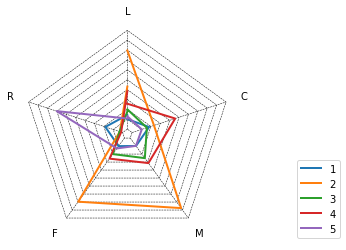

In [6]:
n_clusters = 5
init1 = "k-means++"
# tsne = TSNE(n_components=2, init='pca', random_state=0)
# X_tsne = tsne.fit_transform(dataset)
mini = float("inf")
bestcenters = []
for i in range(1,100):
    centers = KMeansPlusPlus(n_clusters = n_clusters, init = init1)._k_means_plus_plus(dataset)[0]
    pot = KMeansPlusPlus(n_clusters = n_clusters, init = init1)._k_means_plus_plus(dataset)[1]
    if pot < mini:
        mini = pot
        bestcenters = centers
print(bestcenters)
bc = pd.DataFrame(bestcenters)
bc.to_csv("bc.csv")
plot_radar(bc)